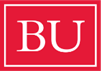 
<div style="text-align: center"> <h1>Assignment - 1</div>


<div style="text-align: center"> <h3>CS677 A3 Data Science With Python (Fall 2024)</div>


<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


### Part - 1: Preliminary Assignment

#### Preliminary Task - 1: Ticker - "META" Meta Platforms, Inc.

#### Preliminary Task - 2: Download Historical data (Jan 1, 2019 to Dec 31, 2023)  

In [ ]:
def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
        #yf.pdr_override()  # Uncomment if necessary
        df = yf.download(ticker, start=start_date, end=end_date)
        #df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace=True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('Read', num_lines, 'lines of data for ticker:', ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker = "META"
    start_date = '2019-01-01'
    end_date = '2023-12-31'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, f'{ticker}.csv')
    df = get_stock(ticker, start_date, end_date, s_window=14, l_window=50)
    if df is not None:
        df.to_csv(output_file, index=False)
        print(f'Wrote {len(df)} lines to file: {output_file}')
except Exception as e:
    print(e)
    print('Failed to get Yahoo stock data for ticker:', ticker)


In [2]:
!pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
!pip install yfinance
import yfinance as yf

#### Preliminary Task - 3: Download CSV

In [ ]:
import os

ticker='META'
input_dir = r'C:\Users\asusw\Desktop\BU MET\BU SEM 3\DSwP\Assignments DSwP'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)
### Part - 1: Preliminary Assignment

### Part - 2: Diamonds Dataset

**💡DATASET - GROUP 3💡-**

I will be analyzing the diamonds with cut "Very Good" for this assignment

##### Solution - 1

In [47]:
#Load CSV
file_path = "diamonds.csv"
with open(file_path, "r") as file:
    data = file.readlines()

#Filter
my_group = [line.strip().split(",") for line in data[1:] if "Very Good" in line]

#Print
print(f"Total number of diamonds with 'Very Good' cut:{len(my_group)}")
for diamond in my_group[:5]:
    print(diamond) 

Total number of diamonds with 'Very Good' cut:12082
['6', '0.24', 'Very Good', 'J', 'VVS2', '62.8', '57', '336', '3.94', '3.96', '2.48']
['7', '0.24', 'Very Good', 'I', 'VVS1', '62.3', '57', '336', '3.95', '3.98', '2.47']
['8', '0.26', 'Very Good', 'H', 'SI1', '61.9', '55', '337', '4.07', '4.11', '2.53']
['10', '0.23', 'Very Good', 'H', 'VS1', '59.4', '61', '338', '4', '4.05', '2.39']
['20', '0.3', 'Very Good', 'J', 'SI1', '62.7', '59', '351', '4.21', '4.27', '2.66']


**💡Interpretation of Results💡-**

This dataset consists of `12082` entries.

In [48]:
carat = [float(diamond[1]) for diamond in my_group]
average_carat = sum(carat)/ len(carat)
print(f"Average weight for Very Good cut diamonds: {average_carat:.2f}")

Average weight for Very Good cut diamonds: 0.81


In [49]:
price = [float(diamond[7]) for diamond in my_group]
average_price = sum(price)/ len(price)
print(f"Average price for Very Good cut diamonds: {average_price:.4f}")

Average price for Very Good cut diamonds: 3981.7599


> **💡DATASET - GROUP 3💡-**
>
> I will be analyzing the diamonds with cut "Very Good" for this assignment

#### Solution - 2

In [50]:
N = len(my_group)

In [53]:
weighted_avg_price_a = sum(float(diamond[7])/float(diamond[1]) for diamond in my_group) / N
print(f"Weighted Average price per carat:${weighted_avg_price_a:.4f}")

Weighted Average price per carat:$4014.1284


In [54]:
total_price = sum(float(diamond[7]) for diamond in my_group)
total_weight = sum(float(diamond[1]) for diamond in my_group)
weighted_avg_price_b = total_price/total_weight
print(f"Weighted Average price per carat:${weighted_avg_price_b:.4f}")

Weighted Average price per carat:$4937.8122


**💡Interpretation of Results💡-**

The weighted average price per carat by method a = `$4014.1284`; Method b = `$4937.8122`. Method a has lower average price as the calculation averages the price per carat of each individual diamond, without considering the total carat weight of the diamonds as a factor. It gives each diamond equal weight regardless of its size.

Thus, method b calculation is more accurate for estimating the total price of a diamond based on its weight. It sums the total price and the total carat weight of all diamonds, then divides the total price by the total weight.


In [55]:
max_price = max(float(diamond[7])/float(diamond[1]) for diamond in my_group)
print(f"Max price per carat:${max_price:.4f}")

Max price per carat:$17828.8462


In [56]:
min_price = min(float(diamond[7])/float(diamond[1]) for diamond in my_group)
print(f"Min price per carat:${min_price:.4f}")

Min price per carat:$1138.7097


In [57]:
price_pc = (float(diamond[7])/float(diamond[1]) for diamond in my_group)
price_pc = sorted(price_pc)
n = len(price_pc)
if n%2==1:
    median_price = price_pc[n//2]
else:
    median_price = (price_pc[(n//2)-1] + price_pc[n//2]) /2
    
print(f"Median price per carat: ${median_price:.4f}")

Median price per carat: $3605.8258


##### Solution - 3

In [59]:
#Track the paeameters for highest and lowest price per carat
max_price_per_carat = 0
min_price_per_carat = float("inf")

max_params = None
min_params = None

for diamond in my_group:
    price_per_carat = float(diamond[7]) / float(diamond[1])
    
    if price_per_carat > max_price_per_carat:
        max_price_per_carat = price_per_carat
        max_params = diamond
        
    if price_per_carat < min_price_per_carat:
        min_price_per_carat = price_per_carat
        min_params = diamond
        
print(f"Highest price per carat: ${max_price_per_carat:.4f}")
print(f"Parameters for highest price: Cut={max_params[0]}, Carat={max_params[1]}, Color={max_params[2]}, Clarity = {max_params[3]}, Depth={max_params[4]}, Table={max_params[5]}, Price={max_params[7]}")

print(f"Lowest price per carat: ${min_price_per_carat:.4f}")
print(f"Parameters for lowest price: Cut={min_params[0]}, Carat={min_params[1]}, Color={min_params[2]}, Clarity = {min_params[3]}, Depth={min_params[4]}, Table={min_params[5]}, Price={min_params[7]}")


Highest price per carat: $17828.8462
Parameters for highest price: Cut=27636, Carat=1.04, Color=Very Good, Clarity = D, Depth=IF, Table=61.3, Price=18542
Lowest price per carat: $1138.7097
Parameters for lowest price: Cut=24, Carat=0.31, Color=Very Good, Clarity = J, Depth=SI1, Table=59.4, Price=353


#### Solution - 4

In [63]:
#The Sotheby's diamond price estimation
estimated_price = weighted_avg_price_b *102.39 
low_estimate = 10000000
high_estimate = 30000000

print(f"Estimated price for a 102.39 carat diamond based on the average price per carat: ${estimated_price:,.4f}")
print(f"Expected auction price range: ${low_estimate:,.4f} to high_estimate:,.4f")

if estimated_price < low_estimate:
    print(f"The estimate is lower than the auction price range by ${(low_estimate - estimated_price):,.4f}.")
elif estimated_price > high_estimate:
    print(f"The estimate is higher than the auction price range by ${(estimated_price - high_estimate):,.4f}.")
else:
    print(f"The estimate falls within the auciton price range.")
    

Estimated price for a 102.39 carat diamond based on the average price per carat: $505,582.5920
Expected auction price range: $10,000,000.0000 to high_estimate:,.4f
The estimate is lower than the auction price range by $9,494,417.4080.


**💡Interpretation of Results💡-**

The significant difference between the estimated price could be because of the quality difference. The Sotheby's diamond is a Flowless diamond ("Ideal"), which is one of the highest possible grades of color and clarity whereas, my estimation was conduted based of "Very Good".

The color, clarity, dimentions, deapth, etc are not taken into consideration for the estimation of the price.